In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

sns.set(context="paper", style="whitegrid", 
       rc={
           "figure.figsize": (21, 9),
           "figure.dpi": 100
       })
google = ["#4285F4", "#DB4437", "#F4B400", "#0F9D58"]

sns.set_palette(google)

## Load Data

In [2]:
df = pd.read_csv("./data/AMPDs2.csv")
df['TIMESTAMP'] = pd.to_datetime(df['TIMESTAMP'])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22075200 entries, 0 to 22075199
Data columns (total 8 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   TIMESTAMP              datetime64[ns]
 1   power factor_apparent  float64       
 2   power_reactive         float64       
 3   power_active           float64       
 4   power_apparent         float64       
 5   appliances_type        object        
 6   appliances_id          int64         
 7   appliances_name        object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 1.3+ GB


In [4]:
df.head()

,TIMESTAMP,power factor_apparent,power_reactive,power_active,power_apparent,appliances_type,appliances_id,appliances_name
0,2012-04-01 00:00:00,0.93,141.0,918.0,1066.0,main,1,main 1
1,2012-04-01 00:01:00,0.93,141.0,913.0,1056.0,main,1,main 1
2,2012-04-01 00:02:00,0.93,139.0,872.0,1021.0,main,1,main 1
3,2012-04-01 00:03:00,0.93,141.0,872.0,1018.0,main,1,main 1
4,2012-04-01 00:04:00,0.89,140.0,772.0,1018.0,main,1,main 1


In [5]:
main_df = df[df['appliances_type'] == 'main']

In [6]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1051200 entries, 0 to 1051199
Data columns (total 8 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   TIMESTAMP              1051200 non-null  datetime64[ns]
 1   power factor_apparent  1051200 non-null  float64       
 2   power_reactive         1051200 non-null  float64       
 3   power_active           1051200 non-null  float64       
 4   power_apparent         1051200 non-null  float64       
 5   appliances_type        1051200 non-null  object        
 6   appliances_id          1051200 non-null  int64         
 7   appliances_name        1051200 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 72.2+ MB


In [7]:
df = df.drop(index=main_df.index)

In [8]:
df = df.reset_index().drop(columns=['index'], axis=1)
df.head()

,TIMESTAMP,power factor_apparent,power_reactive,power_active,power_apparent,appliances_type,appliances_id,appliances_name
0,2012-04-01 00:00:00,0.0,0.0,0.0,9.0,light,1,light 1
1,2012-04-01 00:01:00,0.0,0.0,0.0,9.0,light,1,light 1
2,2012-04-01 00:02:00,0.0,0.0,0.0,9.0,light,1,light 1
3,2012-04-01 00:03:00,0.0,0.0,0.0,9.0,light,1,light 1
4,2012-04-01 00:04:00,0.0,0.0,0.0,9.0,light,1,light 1


### Data sampling period

In [9]:
sampling_period = int((df['TIMESTAMP'][1] - df['TIMESTAMP'][0]).total_seconds()/60)
sampling_period

1

In [10]:
oneday_n = 24*60//sampling_period
oneday_n

1440

In [11]:
oneweek_n = oneday_n*7
oneweek_n

10080

### Add new column

`weekday`: monday = 0, sunday = 6

In [12]:
df['weekday'] = df['TIMESTAMP'].dt.weekday
df['month'] = df['TIMESTAMP'].dt.month

df['day_minute'] = (df['TIMESTAMP'].dt.hour*60) + (df['TIMESTAMP'].dt.minute)
df['week_minute'] = (df['weekday']*oneday_n) + df['day_minute']

In [13]:
df.head()

,TIMESTAMP,power factor_apparent,power_reactive,power_active,power_apparent,appliances_type,appliances_id,appliances_name,weekday,month,day_minute,week_minute
0,2012-04-01 00:00:00,0.0,0.0,0.0,9.0,light,1,light 1,6,4,0,8640
1,2012-04-01 00:01:00,0.0,0.0,0.0,9.0,light,1,light 1,6,4,1,8641
2,2012-04-01 00:02:00,0.0,0.0,0.0,9.0,light,1,light 1,6,4,2,8642
3,2012-04-01 00:03:00,0.0,0.0,0.0,9.0,light,1,light 1,6,4,3,8643
4,2012-04-01 00:04:00,0.0,0.0,0.0,9.0,light,1,light 1,6,4,4,8644


In [14]:
main_df['weekday'] = main_df['TIMESTAMP'].dt.weekday
main_df['month'] = main_df['TIMESTAMP'].dt.month

main_df['day_minute'] = (main_df['TIMESTAMP'].dt.hour*60) + (main_df['TIMESTAMP'].dt.minute)
main_df['week_minute'] = (main_df['weekday']*oneday_n) + main_df['day_minute']

In [15]:
main_df.head()

,TIMESTAMP,power factor_apparent,power_reactive,power_active,power_apparent,appliances_type,appliances_id,appliances_name,weekday,month,day_minute,week_minute
0,2012-04-01 00:00:00,0.93,141.0,918.0,1066.0,main,1,main 1,6,4,0,8640
1,2012-04-01 00:01:00,0.93,141.0,913.0,1056.0,main,1,main 1,6,4,1,8641
2,2012-04-01 00:02:00,0.93,139.0,872.0,1021.0,main,1,main 1,6,4,2,8642
3,2012-04-01 00:03:00,0.93,141.0,872.0,1018.0,main,1,main 1,6,4,3,8643
4,2012-04-01 00:04:00,0.89,140.0,772.0,1018.0,main,1,main 1,6,4,4,8644


### get top appliances by power consumption

In [16]:
top_power_consump = df[df["power_active"] >= 40]\
    .groupby(["appliances_name"])\
    .mean()\
    .sort_values("power_active", ascending=False)\
    .reset_index()['appliances_name'].tolist()

In [17]:
top_power_consump

['unknown 1',
 'heat pump 1',
 'electric oven 1',
 'unknown 3',
 'light 1',
 'light 3',
 'unknown 7',
 'sockets 2',
 'unknown 9',
 'unknown 2',
 'unknown 4',
 'television 1',
 'fridge 1',
 'unknown 6',
 'light 2',
 'light 4',
 'sockets 3',
 'unknown 8',
 'sockets 1',
 'unknown 5']

## EDA

In [18]:
# select top appliance
top_k = 10
num_appliance = len(top_power_consump)
power_col = 'power_active'

### resample

In [19]:
resample_min = 5
re_main_df = main_df.copy()
re_main_df.index = re_main_df['TIMESTAMP']
re_main_df = re_main_df.resample(f"{resample_min}min").mean().reset_index()
re_main_df.head()

,TIMESTAMP,power factor_apparent,power_reactive,power_active,power_apparent,appliances_id,weekday,month,day_minute,week_minute
0,2012-04-01 00:00:00,0.922,140.4,869.4,1035.8,1,6,4,2,8642
1,2012-04-01 00:05:00,0.924,181.2,1030.4,1229.0,1,6,4,7,8647
2,2012-04-01 00:10:00,0.946,304.8,1684.0,1862.8,1,6,4,12,8652
3,2012-04-01 00:15:00,0.972,497.4,2838.2,3035.8,1,6,4,17,8657
4,2012-04-01 00:20:00,0.976,430.0,2656.4,2922.8,1,6,4,22,8662


In [20]:
re_main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210240 entries, 0 to 210239
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   TIMESTAMP              210240 non-null  datetime64[ns]
 1   power factor_apparent  210240 non-null  float64       
 2   power_reactive         210240 non-null  float64       
 3   power_active           210240 non-null  float64       
 4   power_apparent         210240 non-null  float64       
 5   appliances_id          210240 non-null  int64         
 6   weekday                210240 non-null  int64         
 7   month                  210240 non-null  int64         
 8   day_minute             210240 non-null  int64         
 9   week_minute            210240 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(5)
memory usage: 16.0 MB


In [21]:
re_main_df = re_main_df.groupby(['month', 'week_minute']).mean().reset_index()
re_main_df['month'] = re_main_df['month'].astype(int)

re_main_df.head()

,month,week_minute,power factor_apparent,power_reactive,power_active,power_apparent,appliances_id,weekday,day_minute
0,1,2,0.92200,164.725,1265.750,1408.725,1,0,2
1,1,7,0.90625,161.800,1004.675,1159.525,1,0,7
2,1,12,0.88825,146.850,915.950,1073.625,1,0,12
3,1,17,0.87300,140.550,826.200,992.775,1,0,17
4,1,22,0.87575,143.025,766.000,935.000,1,0,22


In [22]:
re_main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24192 entries, 0 to 24191
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   month                  24192 non-null  int32  
 1   week_minute            24192 non-null  int64  
 2   power factor_apparent  24192 non-null  float64
 3   power_reactive         24192 non-null  float64
 4   power_active           24192 non-null  float64
 5   power_apparent         24192 non-null  float64
 6   appliances_id          24192 non-null  int64  
 7   weekday                24192 non-null  int64  
 8   day_minute             24192 non-null  int64  
dtypes: float64(4), int32(1), int64(4)
memory usage: 1.6 MB


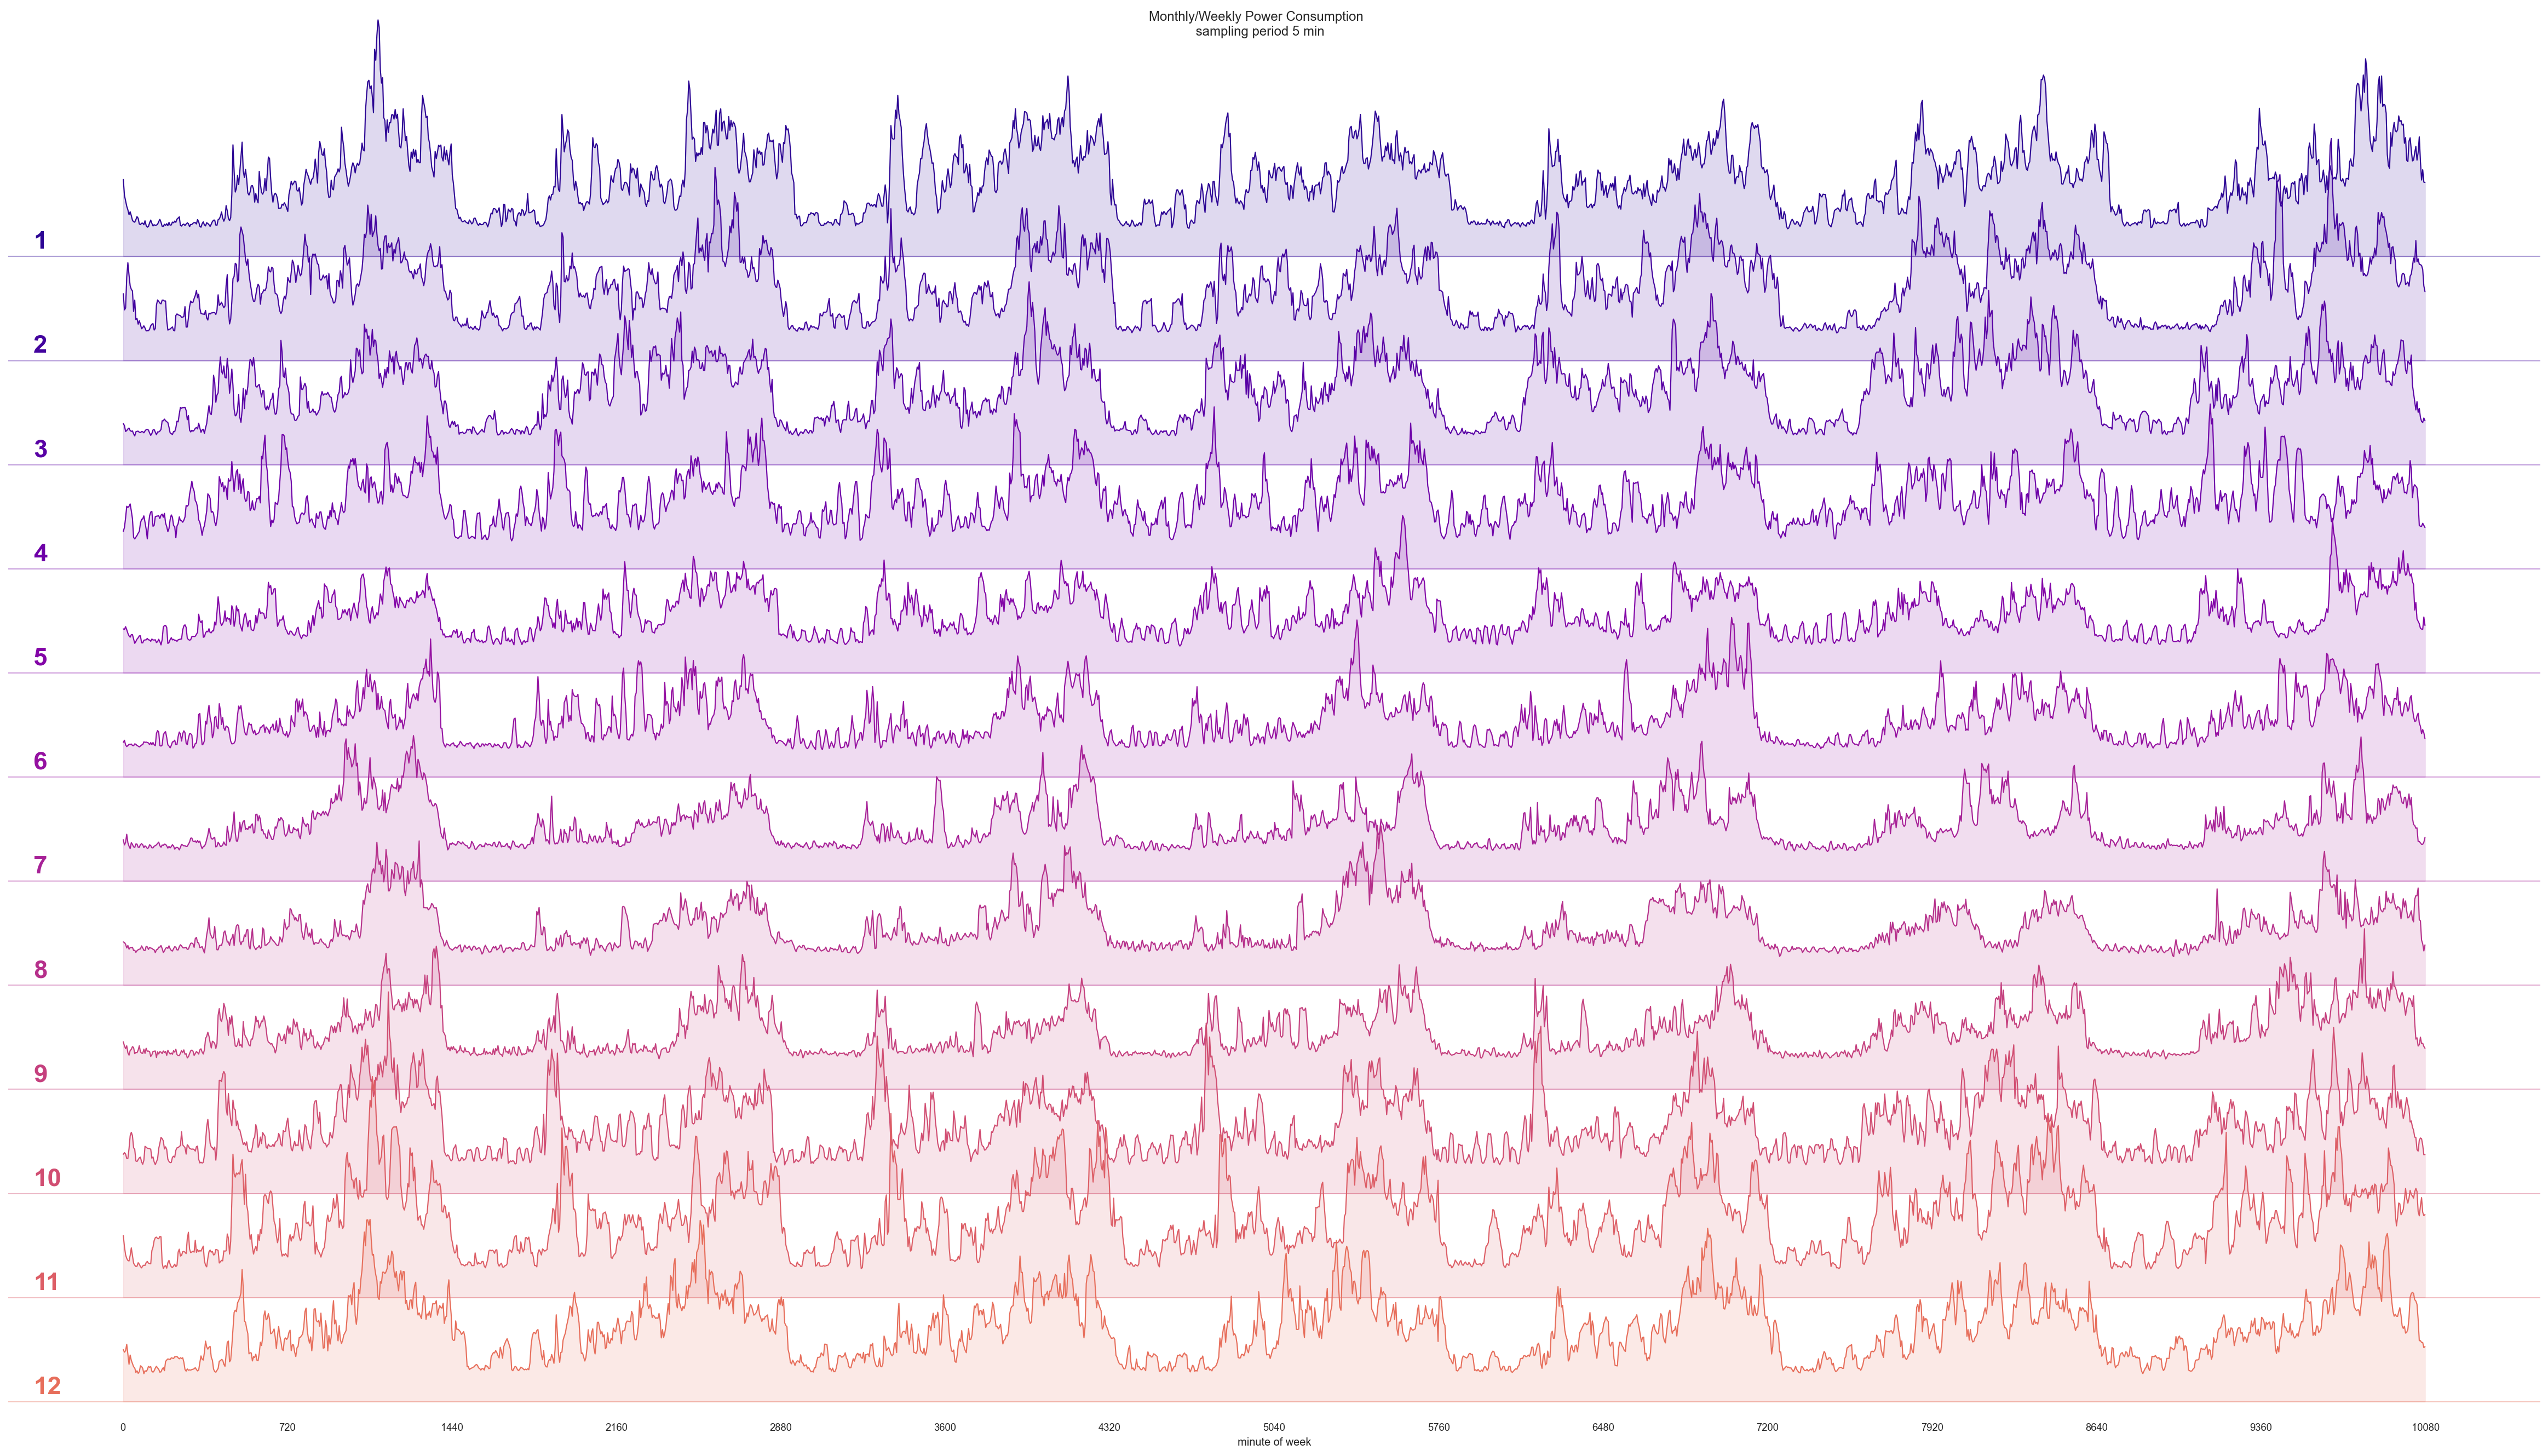

In [31]:
def label(x, color, label):
    ax = plt.gca()
    ax.text(0.01, 0.1,
           int(label),
           fontweight="bold",
           color=color,
           size=22,
           ha="left",
           va="center",
           transform=ax.transAxes)


sns.set(context="paper", style="white", 
       rc={
           "figure.figsize": (42, 9),
           "figure.dpi": 150,
           "axes.facecolor": (0, 0, 0, 0)
       })
sns.set_palette("plasma", 18)

g = sns.FacetGrid(re_main_df,
                  row='month',
                  hue='month',
                  aspect=21,
                  height=1.5)

g.map(sns.lineplot, "week_minute", "power_active", lw=1, alpha=1)
g.map(plt.fill_between, "week_minute", "power_active", alpha=0.15)
g.map(plt.axhline, y=0, lw=0.75, alpha=0.5)
g.map(label, "month")
g.fig.subplots_adjust(hspace= -0.60)
g.set_titles("")
g.despine(bottom=True, left=True)
g.set(yticks=[])
g.set(xticks=np.arange(0, oneweek_n+oneday_n/2, oneday_n/2))


plt.suptitle(f"Monthly/Weekly Power Consumption \n sampling period {resample_min} min")
plt.xlabel("minute of week")
plt.savefig("./visualization_output/04_facet_grid_resample_ver.png", dpi=250)